In [12]:
import json
with open("stortinget.json", encoding="utf-8") as fil:
    data = json.load(fil)
    politikere = data["representanter_liste"]


In [14]:
# Øveprøve
# Lag en for-løkke som printer navn og tilhørnde parti på alle politikerne

for politiker in politikere:
    print(f"{politiker['fornavn']} {politiker['etternavn']}: {politiker['parti']['navn']}")

Maria Aasen-Svensrud: Arbeiderpartiet
Åsmund Aukrust: Arbeiderpartiet
Abid Raja: Venstre
Anja Ninasdotter Abusland: Senterpartiet
Anna Molberg: Høyre
Aleksander Stokkebø: Høyre
Alfred Jens Bjørlo: Venstre
Anne Kristine Linnestad: Høyre
Audun Lysbakken: Sosialistisk Venstreparti
Anniken Huitfeldt: Arbeiderpartiet
André N. Skjelstad: Venstre
Anette Trettebergstuen: Arbeiderpartiet
Andreas Sjalg Unneland: Sosialistisk Venstreparti
Bengt Rune Strifeldt: Fremskrittspartiet
Bengt Fasteraune: Senterpartiet
Birgit Oline Kjerstad: Sosialistisk Venstreparti
Bjørnar Moxnes: Rødt
Bjørnar Skjæran: Arbeiderpartiet
Bård Ludvig Thorheim: Høyre
Bård Hoksrud: Fremskrittspartiet
Carl I. Hagen: Fremskrittspartiet
Christian Tybring-Gjedde: Fremskrittspartiet
Cecilie Myrseth: Arbeiderpartiet
Dagfinn Henrik Olsen: Fremskrittspartiet
Dag-Inge Ulstein: Kristelig Folkeparti
Espen Barth Eide: Arbeiderpartiet
Emilie Mehl: Senterpartiet
Eigil Knutsen: Arbeiderpartiet
Else Marie Rødby: Senterpartiet
Hårek Elvenes: 

In [28]:
# Lag en ordbok som teller antall representanter hvert parti har
antall = {}

for politiker in politikere:
    parti = politiker['parti']['navn']
    if parti not in antall:
        antall[parti] = 1
    else:
        antall[parti] += 1
print(antall)

# Alternativt:
parti_teller = {}

for politiker in politikere:
    parti_navn = politiker["parti"]["navn"]
    if parti_navn in parti_teller:
        parti_teller[parti_navn] += 1
    else:
        parti_teller[parti_navn] = 1


{'Arbeiderpartiet': 48, 'Venstre': 8, 'Senterpartiet': 28, 'Høyre': 36, 'Sosialistisk Venstreparti': 13, 'Fremskrittspartiet': 21, 'Rødt': 8, 'Kristelig Folkeparti': 3, 'Pasientfokus': 1, 'Miljøpartiet De Grønne': 3}


In [29]:
# Hvilket parti har flest representanter på Stortinget og hvor mange har de?

partier_liste = antall.items()

partier_sortert = sorted(partier_liste, key=lambda parti: parti[1])
parti_flest = partier_sortert[-1]
print(f"Partiet med flest politikere på tinget er {parti_flest[0]} de har {parti_flest[1]}")


# alternativt
max_representanter = max(parti_teller.values())
parti_med_flest_representanter = [parti for parti, antall in parti_teller.items() if antall == max_representanter]
print(f"Partiet med flest representanter på Stortinget er {parti_med_flest_representanter} med {max_representanter} representanter.")

Partiet med flest politikere på tinget er Arbeiderpartiet de har 48
Partiet med flest representanter på Stortinget er ['Arbeiderpartiet'] med 48 representanter.


Text(0, 0.5, 'Representanter')

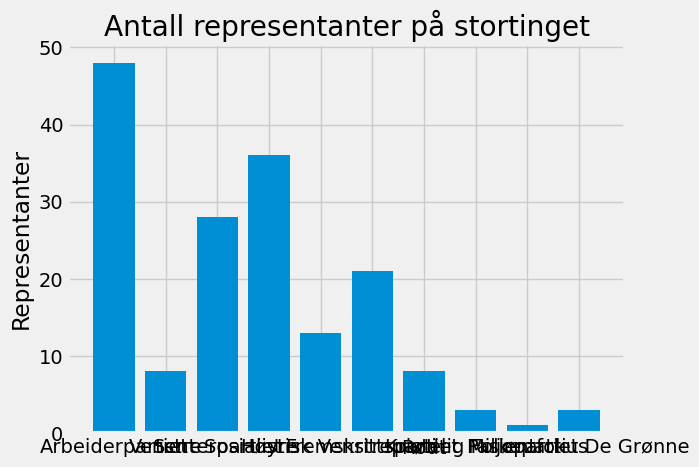

In [32]:
# Lag et plott som viser en oversikt over partier og antall representanter
import matplotlib.pyplot as plt

partier_plot = list(antall.keys())
partier_representanter = list(antall.values())

plt.bar(partier_plot, partier_representanter)
plt.title("Antall representanter på stortinget")
plt.ylabel("Representanter")


In [38]:
# Hvor mange representanter har hvert parti i gjennomsnitt?

total = 0
for parti in antall:
    total += antall[parti]
snitt = total / len(antall)
print(f"Hvert parti har i gjennomsnitt {snitt} representanter")

Hvert parti har i gjennomsnitt 16.9 representanter


In [43]:
# Større oppgaver Youtube

import json
with open("Global-YouTube-Statistics.json", encoding="utf-8") as fil:
    kanaler = json.load(fil)

In [60]:
# Lag et program som finner og presenterer de ti landene i datasettet som har flest YouTube-kanaler.
land_antall = {}

for kanal in kanaler:
    land = kanal["Country"]
    if land not in land_antall:
        land_antall[land] = 1
    else:
        land_antall[land] += 1

land_liste = land_antall.items()
land_sortert = sorted(land_liste, key=lambda x: x[1], reverse=True)

print("De ti landene med flest YouTube-kanaler er:")
for i, (land, antall) in enumerate(land_sortert[:10]):
    print(f"{i}. {land}: {antall} kanaler")

# alternativt:
# for kanal in kanaler:
#     land = kanal["Country"]
#     land_antall[land] = land_antall.get(land, 0) + 1


print

De ti landene med flest YouTube-kanaler er:
0. United States: 313 kanaler
1. India: 168 kanaler
2. nan: 122 kanaler
3. Brazil: 62 kanaler
4. United Kingdom: 43 kanaler
5. Mexico: 33 kanaler
6. Indonesia: 28 kanaler
7. Spain: 22 kanaler
8. Thailand: 18 kanaler
9. South Korea: 17 kanaler


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [61]:
# Utvid programmet til å regne ut og presentere gjennomsnittlig antall abonnenter og videovisninger per kanal for hvert av disse landene.

land_antall = {}
land_abonnenter = {}
land_videovisninger = {}

# Gå gjennom hver kanal og tell antall kanaler per land
for kanal in kanaler:
    land = kanal["Country"]
    if land not in land_antall:
        land_antall[land] = 1
        land_abonnenter[land] = kanal["subscribers"]
        land_videovisninger[land] = kanal["video views"]
    else:
        land_antall[land] += 1
        land_abonnenter[land] += kanal["subscribers"]
        land_videovisninger[land] += kanal["video views"]

# Beregn gjennomsnittlig antall abonnenter og videovisninger per kanal for hvert land
for land in land_antall:
    land_abonnenter[land] /= land_antall[land]
    land_videovisninger[land] /= land_antall[land]

# Presenter de ti landene med flest YouTube-kanaler og deres gjennomsnittlige antall abonnenter og videovisninger per kanal
print("De ti landene med flest YouTube-kanaler er:")
for i, (land, antall) in enumerate(sorted(land_antall.items(), key=lambda x: x[1], reverse=True)[:10], 1):
    gjennomsnittlig_abonnenter = land_abonnenter[land]
    gjennomsnittlig_videovisninger = land_videovisninger[land]
    print(f"{i}. {land}: {antall} kanaler - Gjennomsnittlig antall abonnenter: {gjennomsnittlig_abonnenter:.2f}, Gjennomsnittlig antall videovisninger: {gjennomsnittlig_videovisninger:.2f}")

De ti landene med flest YouTube-kanaler er:
1. United States: 313 kanaler - Gjennomsnittlig antall abonnenter: 23416932.91, Gjennomsnittlig antall videovisninger: 11790069702.74
2. India: 168 kanaler - Gjennomsnittlig antall abonnenter: 25658333.33, Gjennomsnittlig antall videovisninger: 13577668900.02
3. nan: 122 kanaler - Gjennomsnittlig antall abonnenter: 23952459.02, Gjennomsnittlig antall videovisninger: 9714363614.37
4. Brazil: 62 kanaler - Gjennomsnittlig antall abonnenter: 19706451.61, Gjennomsnittlig antall videovisninger: 7761435068.82
5. United Kingdom: 43 kanaler - Gjennomsnittlig antall abonnenter: 21334883.72, Gjennomsnittlig antall videovisninger: 10013175153.67
6. Mexico: 33 kanaler - Gjennomsnittlig antall abonnenter: 18996969.70, Gjennomsnittlig antall videovisninger: 6006664609.79
7. Indonesia: 28 kanaler - Gjennomsnittlig antall abonnenter: 19075000.00, Gjennomsnittlig antall videovisninger: 5393238180.54
8. Spain: 22 kanaler - Gjennomsnittlig antall abonnenter: 175

In [64]:
# Google play store

import json
with open("googleplaystore.json", encoding="utf-8") as fil:
    apper = json.load(fil)

In [72]:
# Lag et program som presenterer en oversikt over de tre største kategoriene målt i antall apper. Oversikten skal vise antallet apper, gjennomsnittsratingen og det gjennomsnittlige antallet installasjoner for hver av disse tre kategoriene.

# Opprett tomme lister for å lagre informasjon om apper og kategorier
apper_per_kategori = {}
total_rating_per_kategori = {}
total_installs_per_kategori = {}

# Gå gjennom hver app og oppdater informasjonen for hver kategori
for app in apper:
    kategori = app["Category"]
    installs = app["Installs"].replace(",", "").rstrip("+")
    # Sjekk om installs er en tallverdi før konvertering
    if installs.isdigit():
        antall_installs = int(installs)
    else:
        antall_installs = 0
    # Sjekk om Rating er en gyldig flyttall før konvertering
    if app["Rating"].replace(".", "", 1).isdigit():
        rating = float(app["Rating"])
    else:
        rating = None

    # Oppdater informasjonen for kategorien
    if kategori in apper_per_kategori:
        apper_per_kategori[kategori] += 1
        total_installs_per_kategori[kategori] += antall_installs
        # Legg til ratingen hvis den er gyldig
        if rating is not None:
            total_rating_per_kategori[kategori] += rating
    else:
        apper_per_kategori[kategori] = 1
        total_installs_per_kategori[kategori] = antall_installs
        # Legg til ratingen hvis den er gyldig
        if rating is not None:
            total_rating_per_kategori[kategori] = rating

# Finn de tre største kategoriene basert på antall apper
top_3_kategorier = sorted(apper_per_kategori.items(), key=lambda x: x[1], reverse=True)[:3]

# Presenter oversikten over de tre største kategoriene
print("Oversikt over de tre største kategoriene:")
for kategori, antall_apper in top_3_kategorier:
    gjennomsnittlig_installs = total_installs_per_kategori[kategori] / antall_apper
    if antall_apper != 0:
        gjennomsnittlig_rating = total_rating_per_kategori[kategori] / antall_apper
        print(f"Kategori: {kategori}")
        print(f"Antall apper: {antall_apper}")
        print(f"Gjennomsnittlig rating: {gjennomsnittlig_rating:.2f}")
        print(f"Gjennomsnittlig antall installasjoner: {gjennomsnittlig_installs:,.0f}\n")
    else:
        print(f"Kategori: {kategori}")
        print("Ingen gyldige data for gjennomsnittlig rating")
        print(f"Gjennomsnittlig antall installasjoner: {gjennomsnittlig_installs:,.0f}\n")


Oversikt over de tre største kategoriene:
Kategori: FAMILY
Antall apper: 1972
Gjennomsnittlig rating: 3.71
Gjennomsnittlig antall installasjoner: 5,201,959

Kategori: GAME
Antall apper: 1144
Gjennomsnittlig rating: 4.11
Gjennomsnittlig antall installasjoner: 30,669,602

Kategori: TOOLS
Antall apper: 843
Gjennomsnittlig rating: 3.52
Gjennomsnittlig antall installasjoner: 13,585,732



In [73]:
# Utvid programmet slik at det også presenterer de tre mest populære appene, målt i antall installasjoner, i hver av disse tre kategoriene.

# Opprett tomme lister for å lagre informasjon om apper og kategorier
apper_per_kategori = {}
total_rating_per_kategori = {}
total_installs_per_kategori = {}

# Gå gjennom hver app og oppdater informasjonen for hver kategori
for app in apper:
    kategori = app["Category"]
    installs = app["Installs"].replace(",", "").rstrip("+")
    # Sjekk om installs er en tallverdi før konvertering
    if installs.isdigit():
        antall_installs = int(installs)
    else:
        antall_installs = 0
    # Sjekk om Rating er en gyldig flyttall før konvertering
    if app["Rating"].replace(".", "", 1).isdigit():
        rating = float(app["Rating"])
    else:
        rating = None

    # Oppdater informasjonen for kategorien
    if kategori in apper_per_kategori:
        apper_per_kategori[kategori].append(app)
        total_installs_per_kategori[kategori] += antall_installs
        # Legg til ratingen hvis den er gyldig
        if rating is not None:
            total_rating_per_kategori[kategori] += rating
    else:
        apper_per_kategori[kategori] = [app]
        total_installs_per_kategori[kategori] = antall_installs
        # Legg til ratingen hvis den er gyldig
        if rating is not None:
            total_rating_per_kategori[kategori] = rating

# Finn de tre største kategoriene basert på antall apper
top_3_kategorier = sorted(apper_per_kategori.items(), key=lambda x: len(x[1]), reverse=True)[:3]

# Presenter oversikten over de tre største kategoriene
print("Oversikt over de tre største kategoriene:")
for kategori, apper in top_3_kategorier:
    gjennomsnittlig_installs = total_installs_per_kategori[kategori] / len(apper)
    if len(apper) != 0:
        gjennomsnittlig_rating = total_rating_per_kategori[kategori] / len(apper)
        print(f"Kategori: {kategori}")
        print(f"Antall apper: {len(apper)}")
        print(f"Gjennomsnittlig rating: {gjennomsnittlig_rating:.2f}")
        print(f"Gjennomsnittlig antall installasjoner: {gjennomsnittlig_installs:,.0f}")
        
        # Finn de tre mest populære appene i kategorien basert på antall installasjoner
        print("De tre mest populære appene i denne kategorien:")
        apper_sortert = sorted(apper, key=lambda x: int(x["Installs"].replace(",", "").rstrip("+")), reverse=True)[:3]
        for idx, app in enumerate(apper_sortert, 1):
            print(f"{idx}. {app['App']} - {app['Installs']}")
        
        print() # Legg til en tom linje mellom hver kategori
    else:
        print(f"Kategori: {kategori}")
        print("Ingen gyldige data for gjennomsnittlig rating")
        print(f"Gjennomsnittlig antall installasjoner: {gjennomsnittlig_installs:,.0f}\n")


Oversikt over de tre største kategoriene:
Kategori: FAMILY
Antall apper: 1972
Gjennomsnittlig rating: 3.71
Gjennomsnittlig antall installasjoner: 5,201,959
De tre mest populære appene i denne kategorien:
1. Google Play Games - 1,000,000,000+
2. Pou - 500,000,000+
3. My Talking Tom - 500,000,000+

Kategori: GAME
Antall apper: 1144
Gjennomsnittlig rating: 4.11
Gjennomsnittlig antall installasjoner: 30,669,602
De tre mest populære appene i denne kategorien:
1. Subway Surfers - 1,000,000,000+
2. Subway Surfers - 1,000,000,000+
3. Subway Surfers - 1,000,000,000+

Kategori: TOOLS
Antall apper: 843
Gjennomsnittlig rating: 3.52
Gjennomsnittlig antall installasjoner: 13,585,732
De tre mest populære appene i denne kategorien:
1. Google - 1,000,000,000+
2. Google - 1,000,000,000+
3. Google Translate - 500,000,000+



In [75]:
# 2.9 
gullballen = [
  {
    "navn": "Luís Figo",
    "år": [2000],
    "nasjonalitet": "Portugal",
    "klubber": ["Real Madrid"]
  },
  {
    "navn": "Michael Owen",
    "år": [2001],
    "nasjonalitet": "England",
    "klubber": ["Liverpool"]
  },
  {
    "navn": "Ronaldo",
    "år": [2002],
    "nasjonalitet": "Brasil",
    "klubber": ["Real Madrid"]
  },
  {
    "navn": "Pavel Nedvěd",
    "år": [2003],
    "nasjonalitet": "Tsjekkia",
    "klubber": ["Juventus"]
  },
  {
    "navn": "Andriy Shevchenko",
    "år": [2004],
    "nasjonalitet": "Ukraina",
    "klubber": ["Milan"]
  },
  {
    "navn": "Ronaldinho",
    "år": [2005],
    "nasjonalitet": "Brasil",
    "klubber": ["Barcelona"]
  },
  {
    "navn": "Fabio Cannavaro",
    "år": [2006],
    "nasjonalitet": "Italia",
    "klubber": ["Real Madrid"]
  },
  {
    "navn": "Kaká",
    "år": [2007],
    "nasjonalitet": "Brasil",
    "klubber": ["Milan"]
  },
  {
    "navn": "Cristiano Ronaldo",
    "år": [2008, 2013, 2014, 2016, 2017],
    "nasjonalitet": "Portugal",
    "klubber": ["Manchester United", "Real Madrid"]
  },
  {
    "navn": "Lionel Messi",
    "år": [2009, 2010, 2011, 2012, 2015, 2019, 2021, 2023],
    "nasjonalitet": "Argentina",
    "klubber": ["Barcelona", "Paris Saint-Germain F.C.", "Inter Miami"]
  },
  {
    "navn": "Luka Modric",
    "år": [2018],
    "nasjonalitet": "Kroatia",
    "klubber": ["Real Madrid"]
  },
  {
    "navn": "Karim Benzema",
    "år": [2022],
    "nasjonalitet": "Frankrike",
    "klubber": ["Real Madrid"]
  }
]


In [77]:
# Lag en for-løkke som printer navn og nasjonalitet på hver spiller.
for spiller in gullballen:
    print(spiller["navn"], spiller["nasjonalitet"])

Luís Figo Portugal
Michael Owen England
Ronaldo Brasil
Pavel Nedvěd Tsjekkia
Andriy Shevchenko Ukraina
Ronaldinho Brasil
Fabio Cannavaro Italia
Kaká Brasil
Cristiano Ronaldo Portugal
Lionel Messi Argentina
Luka Modric Kroatia
Karim Benzema Frankrike


In [78]:
# Utvid koden slik at for-løkken også printer antall gullballer spillerne har vunnet.
for spiller in gullballen:
    print(spiller["navn"], spiller["nasjonalitet"], len(spiller["år"]))

Luís Figo Portugal 1
Michael Owen England 1
Ronaldo Brasil 1
Pavel Nedvěd Tsjekkia 1
Andriy Shevchenko Ukraina 1
Ronaldinho Brasil 1
Fabio Cannavaro Italia 1
Kaká Brasil 1
Cristiano Ronaldo Portugal 5
Lionel Messi Argentina 8
Luka Modric Kroatia 1
Karim Benzema Frankrike 1


In [79]:
# 2.10
top_30 = [
    {"name": "Cristiano Ronaldo", "account": "@cristiano", "followers": 617.16, "nationality": "Portugal"},
    {"name": "Leo Messi", "account": "@leomessi", "followers": 497.05, "nationality": "Argentina"},
    {"name": "Selena Gomez", "account": "@selenagomez", "followers": 429.66, "nationality": "United States"},
    {"name": "Kylie Jenner", "account": "@kyliejenner", "followers": 399.45, "nationality": "United States"},
    {"name": "Dwayne Johnson", "account": "@therock", "followers": 395.59, "nationality": "United States"},
    {"name": "Ariana Grande", "account": "@arianagrande", "followers": 380.78, "nationality": "United States"},
    {"name": "Kim Kardashian", "account": "@kimkardashian", "followers": 364, "nationality": "United States"},
    {"name": "Beyoncé", "account": "@beyonce", "followers": 319.6, "nationality": "United States"},
    {"name": "Khloé Kardashian", "account": "@khloekardashian", "followers": 311.3, "nationality": "United States"},
    {"name": "Nike", "account": "@nike", "followers": 306, "nationality": "United States"},
    {"name": "Justin Bieber", "account": "@justinbieber", "followers": 304.9, "nationality": "Canada"},
    {"name": "Taylor Swift", "account": "@taylorswift", "followers": 282.8, "nationality": "United States"},
    {"name": "Neymar Jr", "account": "@neymarjr", "followers": 282.7, "nationality": "Brazil"},
    {"name": "Kendall Jenner", "account": "@kendalljenner", "followers": 279.9, "nationality": "United States"},
    {"name": "Jennifer Lopez", "account": "@jlo", "followers": 277.2, "nationality": "United States"},
    {"name": "Nicki Minaj", "account": "@nickiminaj", "followers": 262.5, "nationality": "Trinidad and Tobago"},
    {"name": "National Geographic", "account": "@natgeo", "followers": 206.9, "nationality": "United States"},
    {"name": "Lionel Andrés Messi Cuccittini", "account": "@leomessi10", "followers": 201.8, "nationality": "Argentina"},
    {"name": "Miley Cyrus", "account": "@mileycyrus", "followers": 198.7, "nationality": "United States"},
    {"name": "Katy Perry", "account": "@katyperry", "followers": 198.4, "nationality": "United States"},
    {"name": "Kourtney Kardashian", "account": "@kourtneykardash", "followers": 196.8, "nationality": "United States"},
    {"name": "Kevin Hart", "account": "@kevinhart4real", "followers": 195.8, "nationality": "United States"},
    {"name": "Ellen DeGeneres", "account": "@theellenshow", "followers": 194.7, "nationality": "United States"},
    {"name": "Virat Kohli", "account": "@virat.kohli", "followers": 194.5, "nationality": "India"},
    {"name": "Billie Eilish", "account": "@billieeilish", "followers": 193.9, "nationality": "United States"},
    {"name": "Rihanna", "account": "@badgalriri", "followers": 191.5, "nationality": "Barbados"},
    {"name": "Zendaya", "account": "@zendaya", "followers": 190.9, "nationality": "United States"},
    {"name": "Drake", "account": "@champagnepapi", "followers": 190.8, "nationality": "Canada"},
    {"name": "Emma Watson", "account": "@emmawatson", "followers": 189.7, "nationality": "United Kingdom"},
    {"name": "LeBron James", "account": "@kingjames", "followers": 188.8, "nationality": "United States"}
]



In [102]:
# Hvor mange følgere har kontoene på listen i gjennomsnitt
teller = 0
for bruker in top_30:
    teller += bruker['followers']
    gjennomsnitt = teller / 30

print(gjennomsnitt)
    

281.45966666666664


In [104]:
# Hvor mange kontoer på listen kommer ikke fra USA?
ikke_USA = 0
for bruker in top_30:
    if bruker["nationality"] != "United States":
        ikke_USA += 1
    else:
        ikke_USA += 0
print(ikke_USA)
        


10


In [106]:
# 2.11
land_info = [
    {"land": "Kina", "hovedstad": "Beijing", "befolkning": 1410000000, "språk": ["Mandarin"]},
    {"land": "India", "hovedstad": "New Delhi", "befolkning": 1390000000, "språk": ["Hindi", "Engelsk"]},
    {"land": "USA", "hovedstad": "Washington, D.C.", "befolkning": 331000000, "språk": ["Engelsk"]},
    {"land": "Indonesia", "hovedstad": "Jakarta", "befolkning": 273000000, "språk": ["Indonesisk"]},
    {"land": "Pakistan", "hovedstad": "Islamabad", "befolkning": 225000000, "språk": ["Urdu", "Engelsk"]},
    {"land": "Brasil", "hovedstad": "Brasília", "befolkning": 213000000, "språk": ["Portugisisk"]},
    {"land": "Nigeria", "hovedstad": "Abuja", "befolkning": 211000000, "språk": ["Engelsk"]},
    {"land": "Bangladesh", "hovedstad": "Dhaka", "befolkning": 166000000, "språk": ["Bengali"]},
    {"land": "Russland", "hovedstad": "Moskva", "befolkning": 146000000, "språk": ["Russisk"]},
    {"land": "Mexico", "hovedstad": "Mexico City", "befolkning": 128000000, "språk": ["Spansk"]},
    {"land": "Japan", "hovedstad": "Tokyo", "befolkning": 125000000, "språk": ["Japansk"]},
    {"land": "Etiopia", "hovedstad": "Addis Ababa", "befolkning": 118000000, "språk": ["Amharisk"]},
    {"land": "Filippinene", "hovedstad": "Manila", "befolkning": 113000000, "språk": ["Filippinsk"]},
    {"land": "Egypt", "hovedstad": "Kairo", "befolkning": 104000000, "språk": ["Arabisk"]},
    {"land": "Vietnam", "hovedstad": "Hanoi", "befolkning": 97400000, "språk": ["Vietnamesisk"]},
    {"land": "DR Kongo", "hovedstad": "Kinshasa", "befolkning": 90000000, "språk": ["Fransk"]},
    {"land": "Turkey", "hovedstad": "Ankara", "befolkning": 83700000, "språk": ["Tyrkisk"]},
    {"land": "Iran", "hovedstad": "Teheran", "befolkning": 83700000, "språk": ["Persisk"]},
    {"land": "Tyskland", "hovedstad": "Berlin", "befolkning": 83000000, "språk": ["Tysk"]},
    {"land": "Thailand", "hovedstad": "Bangkok", "befolkning": 70000000, "språk": ["Thai"]},
    {"land": "Frankrike", "hovedstad": "Paris", "befolkning": 67000000, "språk": ["Fransk"]},
    {"land": "Storbritannia", "hovedstad": "London", "befolkning": 67000000, "språk": ["Engelsk"]},
    {"land": "Italia", "hovedstad": "Roma", "befolkning": 60300000, "språk": ["Italiensk"]},
    {"land": "Sør-Afrika", "hovedstad": "Pretoria, Cape Town, Bloemfontein", "befolkning": 60000000,
     "språk": ["Afrikaans", "Engelsk", "isiNdebele", "isiXhosa", "isiZulu", "sesotho", "Setswana", "siSwati", "Tshivenda", "Xitsonga"]},
    {"land": "Myanmar", "hovedstad": "Naypyidaw", "befolkning": 54400000, "språk": ["Burmese"]},
    {"land": "Sør-Korea", "hovedstad": "Seoul", "befolkning": 51700000, "språk": ["Koreansk"]},
    {"land": "Colombia", "hovedstad": "Bogotá", "befolkning": 50300000, "språk": ["Spansk"]},
    {"land": "Kenya", "hovedstad": "Nairobi", "befolkning": 49000000, "språk": ["Swahili", "Engelsk"]},
    {"land": "Spania", "hovedstad": "Madrid", "befolkning": 47000000, "språk": ["Spansk"]},
    {"land": "Argentina", "hovedstad": "Buenos Aires", "befolkning": 45000000, "språk": ["Spansk"]},
]

In [107]:
# Lag en for-løkke som printer navn, hovedstad og antall språk for hvert land.

for land in land_info:
    print(land["land"], land["hovedstad"], len(land["språk"]))

Kina Beijing 1
India New Delhi 2
USA Washington, D.C. 1
Indonesia Jakarta 1
Pakistan Islamabad 2
Brasil Brasília 1
Nigeria Abuja 1
Bangladesh Dhaka 1
Russland Moskva 1
Mexico Mexico City 1
Japan Tokyo 1
Etiopia Addis Ababa 1
Filippinene Manila 1
Egypt Kairo 1
Vietnam Hanoi 1
DR Kongo Kinshasa 1
Turkey Ankara 1
Iran Teheran 1
Tyskland Berlin 1
Thailand Bangkok 1
Frankrike Paris 1
Storbritannia London 1
Italia Roma 1
Sør-Afrika Pretoria, Cape Town, Bloemfontein 10
Myanmar Naypyidaw 1
Sør-Korea Seoul 1
Colombia Bogotá 1
Kenya Nairobi 2
Spania Madrid 1
Argentina Buenos Aires 1


In [116]:
# Hvilket land har flest språk?
maks_språk = 0
for land in land_info:
    antall_språk = len(land["språk"])
    if antall_språk > maks_språk:
        maks_språk = antall_språk
        land_mest = land["land"]

print(land_mest, maks_språk)
    

Sør-Afrika 10


In [117]:
# Lag en ordbok som holder oversikt over språk og antall land som har språket som offisielt språk.
sprak_oversikt = {}

for land in land_info:
    for sprak in land["språk"]:
        if sprak in sprak_oversikt:
            sprak_oversikt[sprak] += 1
        else:
            sprak_oversikt[sprak] = 1

for sprak in sprak_oversikt:
    antall_land = sprak_oversikt[sprak]
    print(f"{sprak}: {antall_land} land")

Mandarin: 1 land
Hindi: 1 land
Engelsk: 7 land
Indonesisk: 1 land
Urdu: 1 land
Portugisisk: 1 land
Bengali: 1 land
Russisk: 1 land
Spansk: 4 land
Japansk: 1 land
Amharisk: 1 land
Filippinsk: 1 land
Arabisk: 1 land
Vietnamesisk: 1 land
Fransk: 2 land
Tyrkisk: 1 land
Persisk: 1 land
Tysk: 1 land
Thai: 1 land
Italiensk: 1 land
Afrikaans: 1 land
isiNdebele: 1 land
isiXhosa: 1 land
isiZulu: 1 land
sesotho: 1 land
Setswana: 1 land
siSwati: 1 land
Tshivenda: 1 land
Xitsonga: 1 land
Burmese: 1 land
Koreansk: 1 land
Swahili: 1 land


In [ ]:
# Sorter ordboken og print ut språket med flest land og antall land.

flest_land_sprak = max(sprak_oversikt, key=sprak_oversikt.get)
antall_land = sprak_oversikt[flest_land_sprak]

print(f"Språket med flest land er '{flest_land_sprak}' med {antall_land} land.")
